In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [5]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
df.BHK.value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

In [7]:
df.Floor.value_counts()
df = df.drop("Floor", axis=1)

In [8]:
df["Area Type"].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [9]:
df["Area Locality"].value_counts()
df = df.drop("Area Locality", axis=1)

In [10]:
df.City.value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [11]:
df["Furnishing Status"].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [12]:
df["Tenant Preferred"].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [13]:
df = df.drop(columns=["Posted On", "Point of Contact"])

In [14]:
df["Furnishing Status"] = df["Furnishing Status"].apply(lambda x: 2. if x == "Furnished" else x).apply(lambda x: 1. if x == "Semi-Furnished" else 0.)

In [15]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,0.0,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,1.0,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,1.0,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,0.0,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,0.0,Bachelors,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("Rent", axis=1)
y = df.Rent

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore")

In [21]:
preproc = ColumnTransformer([
        ("scale", ss, ["Size", "Furnishing Status", "Bathroom"]),
        ("encoder", ohe, ["Area Type", "City", "Tenant Preferred"])
    ])

In [22]:
from sklearn.svm import SVR

In [23]:
lr = SVR(C=100_000)

In [24]:
lr = Pipeline([
    ("preproc", preproc),
    ("lr", lr)
])

In [25]:
lr = lr.fit(X_train, y_train)

In [26]:
y_pred = lr.predict(X_test)

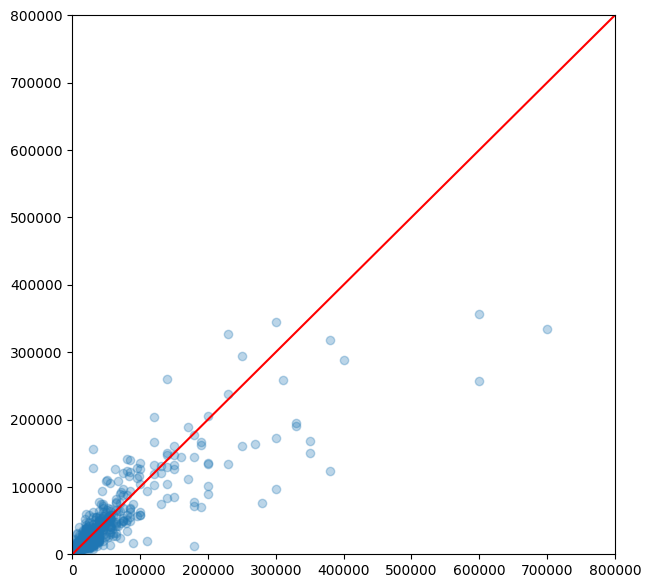

In [27]:
_ = plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlim([0, 800_000])
plt.ylim([0, 800_000])
plt.plot([0, 800_000], [0, 800_000], c="r")

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error

In [29]:
r2_score(y_test.values, y_pred)

0.7283766769675755

In [30]:
mean_absolute_error(y_test.values, y_pred)

12043.13851806107

In [31]:
y_test.mean()

35095.792631578945